In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
google = pd.read_csv('data.csv') #google reviews data
tripadvisor = pd.read_csv('tripadvisordata.csv') #tripadvisor data

/var/folders/_x/zjy2t0_91j3fcrwwh4976v6c0000gn/T/ipykernel_82930/762088741.py:1: DtypeWarning: Columns (9,10,30,32,33,34,35,36) have mixed types. Specify dtype option on import or set low_memory=False.
  google = pd.read_csv('data.csv') #google reviews data


In [5]:
google.head(1)

,address,categories/0,categories/1,categories/2,categories/3,categories/4,categories/5,categories/6,categories/7,categories/8,...,stars,state,street,subTitle,temporarilyClosed,text,title,totalScore,url,website
0,"42 Crawford St, London W1H 1JW, United Kingdom",Tapas restaurant,Italian restaurant,Spanish restaurant,NaN,NaN,NaN,NaN,NaN,NaN,...,5,NaN,42 Crawford St,NaN,False,We came here for a dinner on Friday evening. T...,Twist Connubio,4.6,https://www.google.com/maps/place/Twist+Connub...,http://www.twistconnubio.com/


In [6]:
tripadvisor.head(1)

,Unnamed: 0,title,text,review date,rating,restaurant,location,total reviews,price,1-star,...,South Asian,South East Asian,American,Middle Eastern,Mediterranean,FrenchEuropean,BritishIrish,Latin American,Bar,African
0,0,Hidden gem,We visited for date night after reading lots o...,18 January 2023,5.0,Bonoo Indian Tapas,"675 Finchley Road, London NW2 2JP England",2022,££ - £££,11,...,True,False,False,False,False,False,False,False,True,False


## Google reviews prep

In [7]:
#Prep for merge: narrowing down the columns and changing the column names for both datasets 

#Google: 
column_names = ['title', 'price', 'publishedAtDate', 'totalScore', 'stars', 'text']

df_google = google[column_names]

#Check missing percentage
df_google.isna().sum().sort_values(ascending=False)/len(df_google)*100 

price              15.781863
text                4.492873
title               0.000000
publishedAtDate     0.000000
totalScore          0.000000
stars               0.000000
dtype: float64

In [8]:
df_google['text'].count()

27741

In [9]:
google.text.count()

27741

In [10]:
df_google.isna().sum().sort_values(ascending=False)

price              4584
text               1305
title                 0
publishedAtDate       0
totalScore            0
stars                 0
dtype: int64

In [11]:
#4.5% of text are missing so we drop those
df_google = df_google[df_google['text'].notna()]
df_google.isna().sum().sort_values(ascending=False)/len(df_google)*100 

price              14.491186
title               0.000000
publishedAtDate     0.000000
totalScore          0.000000
stars               0.000000
text                0.000000
dtype: float64

In [12]:
len(df_google.title[df_google['price'].isna()].unique()) #23 of the restaurants have no price category.
#Their reviews take up 14.49% of the data, therefore we will not take price into account in our model.

23

In [13]:
df_google.rename({'title': 'restaurant', 'publishedAtDate': 'review_date', 'totalScore': 'total_score'}, axis=1, inplace=True)

In [14]:
#Changing date format for future plot
df_google['review_date'] = pd.to_datetime(df_google['review_date'])
df_google['review_date'] = pd.to_datetime(df_google['review_date'].dt.strftime('%Y-%m-%d'))
df_google['review_date'].dtypes

dtype('<M8[ns]')

In [15]:
df_google

,restaurant,price,review_date,total_score,stars,text
0,Twist Connubio,$$$,2022-03-26,4.6,5,We came here for a dinner on Friday evening. T...
1,Twist Connubio,$$$,2021-11-28,4.6,5,"This meal is perhaps one of the best, if not t..."
2,Twist Connubio,$$$,2022-07-09,4.6,5,Delicious tapas-style Italo-Spanish restaurant...
3,Twist Connubio,$$$,2021-10-15,4.6,4,Lovely tapas and the tasting menu have great o...
4,Twist Connubio,$$$,2022-03-29,4.6,5,"The service was top notch, the food was delici..."
...,...,...,...,...,...,...
29041,Brawn,€€,2018-07-01,4.7,5,The food here is truly fantastic. The service ...
29042,Brawn,€€,2019-11-23,4.7,4,Very nice and convivial place. Went with my be...
29043,Brawn,€€,2017-08-06,4.7,4,"If you want a really interesting menu, beautif..."
29044,Brawn,€€,2022-11-29,4.7,5,Wonderful food!


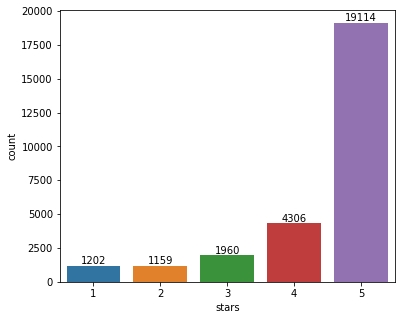

In [16]:
#Google star count
fig, ax = plt.subplots(figsize=(6, 5))
sns.countplot(data=df_google, x="stars")
ax.bar_label(ax.containers[0])
plt.show()

## Tripadvisor prep

In [17]:
df_tripadvisor = tripadvisor[['restaurant','price', 'review date', 'float rating', 'rating', 'text']]
df_tripadvisor = df_tripadvisor.rename({'review date': 'review_date', 'float rating': 'total_score', 'rating': 'stars'}, axis=1)
df_tripadvisor

,restaurant,price,review_date,total_score,stars,text
0,Bonoo Indian Tapas,££ - £££,18 January 2023,4.75,5.0,We visited for date night after reading lots o...
1,Bonoo Indian Tapas,££ - £££,17 January 2023,4.75,5.0,Lovely setting and food was amazing. We ordere...
2,Bonoo Indian Tapas,££ - £££,17 January 2023,4.75,4.0,"Delicious food, especially the lollipop chicke..."
3,Bonoo Indian Tapas,££ - £££,16 January 2023,4.75,5.0,"FLABBERGASTED ! wauw, wonderful great combine ..."
4,Bonoo Indian Tapas,££ - £££,15 January 2023,4.75,5.0,Really hospitable restaurant with servers happ...
...,...,...,...,...,...,...
46298,Modern Wing Chi Chef,£,2 October 2020,1.75,1.0,I can tell by other online reviews that this r...
46299,Modern Wing Chi Chef,£,29 September 2020,1.75,5.0,"Food was all delicious, we ordered late in the..."
46300,Modern Wing Chi Chef,£,26 September 2020,1.75,1.0,Pre ordered at 1845 for 2030 delivery.Arrived ...
46301,Modern Wing Chi Chef,£,15 August 2020,1.75,1.0,This is a fake restaurant do not eat here at a...


In [18]:
#Check missing percentage
df_tripadvisor.isna().sum().sort_values(ascending=False)/len(df_google)*100

price          3.673263
text           0.068491
restaurant     0.000000
review_date    0.000000
total_score    0.000000
stars          0.000000
dtype: float64

In [19]:
df_tripadvisor.isna().sum().sort_values(ascending=False)

price          1019
text             19
restaurant        0
review_date       0
total_score       0
stars             0
dtype: int64

In [20]:
#Dropping the empty reviews
df_tripadvisor = df_tripadvisor[df_tripadvisor['text'].notna()]
df_tripadvisor.isnull().sum() 

restaurant        0
price          1019
review_date       0
total_score       0
stars             0
text              0
dtype: int64

In [21]:
df_tripadvisor['price'].value_counts()
#Dropping the price column as they are not comparable between google reviews and tripadvisor reviews.

££ - £££    38184
££££         3648
£            3419
€5 - €9        14
Name: price, dtype: int64

In [22]:
df_tripadvisor['stars'] = df_tripadvisor['stars'].astype('int')

/var/folders/_x/zjy2t0_91j3fcrwwh4976v6c0000gn/T/ipykernel_82930/3590937122.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_tripadvisor['stars'] = df_tripadvisor['stars'].astype('int')


In [23]:
df_tripadvisor['stars'] = df_tripadvisor['stars'].astype('str')

/var/folders/_x/zjy2t0_91j3fcrwwh4976v6c0000gn/T/ipykernel_82930/3384440135.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_tripadvisor['stars'] = df_tripadvisor['stars'].astype('str')


In [24]:
df_tripadvisor['stars'].dtypes

dtype('O')

In [25]:
#Changing date format for future plot
df_tripadvisor['review_date'] = pd.to_datetime(df_tripadvisor['review_date'])
df_tripadvisor['review_date'] = pd.to_datetime(df_tripadvisor['review_date'].dt.strftime('%Y-%m-%d'))
df_tripadvisor['review_date'].dtypes

/var/folders/_x/zjy2t0_91j3fcrwwh4976v6c0000gn/T/ipykernel_82930/3005568734.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_tripadvisor['review_date'] = pd.to_datetime(df_tripadvisor['review_date'])
/var/folders/_x/zjy2t0_91j3fcrwwh4976v6c0000gn/T/ipykernel_82930/3005568734.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_tripadvisor['review_date'] = pd.to_datetime(df_tripadvisor['review_date'].dt.strftime('%Y-%m-%d'))


dtype('<M8[ns]')

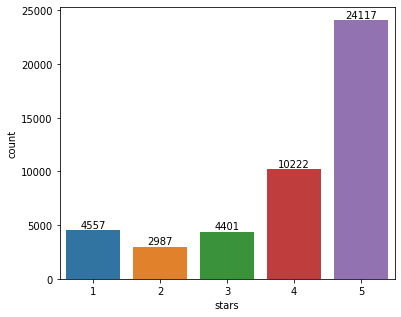

In [26]:
#Tripadvisor star count
fig, ax = plt.subplots(figsize=(6, 5))
sns.countplot(data = df_tripadvisor, x=df_tripadvisor["stars"].sort_values())
ax.bar_label(ax.containers[0])
plt.show()

## Concatinating the two dataframes

In [27]:
df_reviews = pd.concat([df_google, df_tripadvisor])
df_reviews

,restaurant,price,review_date,total_score,stars,text
0,Twist Connubio,$$$,2022-03-26,4.60,5,We came here for a dinner on Friday evening. T...
1,Twist Connubio,$$$,2021-11-28,4.60,5,"This meal is perhaps one of the best, if not t..."
2,Twist Connubio,$$$,2022-07-09,4.60,5,Delicious tapas-style Italo-Spanish restaurant...
3,Twist Connubio,$$$,2021-10-15,4.60,4,Lovely tapas and the tasting menu have great o...
4,Twist Connubio,$$$,2022-03-29,4.60,5,"The service was top notch, the food was delici..."
...,...,...,...,...,...,...
46298,Modern Wing Chi Chef,£,2020-10-02,1.75,1,I can tell by other online reviews that this r...
46299,Modern Wing Chi Chef,£,2020-09-29,1.75,5,"Food was all delicious, we ordered late in the..."
46300,Modern Wing Chi Chef,£,2020-09-26,1.75,1,Pre ordered at 1845 for 2030 delivery.Arrived ...
46301,Modern Wing Chi Chef,£,2020-08-15,1.75,1,This is a fake restaurant do not eat here at a...


In [28]:
df_reviews['word_count'] = df_reviews['text'].str.split().map(lambda x: len(x))
df_reviews

,restaurant,price,review_date,total_score,stars,text,word_count
0,Twist Connubio,$$$,2022-03-26,4.60,5,We came here for a dinner on Friday evening. T...,84
1,Twist Connubio,$$$,2021-11-28,4.60,5,"This meal is perhaps one of the best, if not t...",144
2,Twist Connubio,$$$,2022-07-09,4.60,5,Delicious tapas-style Italo-Spanish restaurant...,89
3,Twist Connubio,$$$,2021-10-15,4.60,4,Lovely tapas and the tasting menu have great o...,46
4,Twist Connubio,$$$,2022-03-29,4.60,5,"The service was top notch, the food was delici...",28
...,...,...,...,...,...,...,...
46298,Modern Wing Chi Chef,£,2020-10-02,1.75,1,I can tell by other online reviews that this r...,28
46299,Modern Wing Chi Chef,£,2020-09-29,1.75,5,"Food was all delicious, we ordered late in the...",26
46300,Modern Wing Chi Chef,£,2020-09-26,1.75,1,Pre ordered at 1845 for 2030 delivery.Arrived ...,41
46301,Modern Wing Chi Chef,£,2020-08-15,1.75,1,This is a fake restaurant do not eat here at a...,52


In [29]:
df_reviews['stars'].unique()

array([5, 4, 3, 2, 1, '5', '4', '1', '3', '2'], dtype=object)

In [30]:
df_reviews['stars'].dtypes

dtype('O')

In [31]:
df_reviews['stars'] = df_reviews['stars'].astype('int')

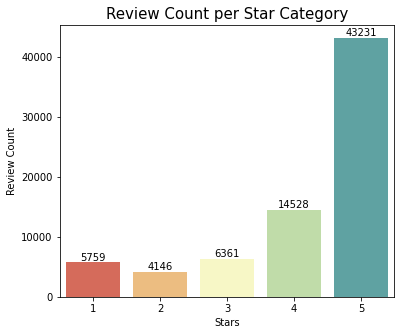

In [32]:
#Reviews star count
fig, ax = plt.subplots(figsize=(6, 5))
sns.countplot(data = df_reviews, x='stars', palette='Spectral')
ax.bar_label(ax.containers[0])
plt.ylabel('Review Count', fontsize=10)
plt.xlabel('Stars', fontsize=10)
#plt.xticks(fontsize=18)
#plt.yticks(fontsize=18)
plt.title('Review Count per Star Category', fontsize=15)
plt.show()

#Dataset is skewed, more than 58% of the reviews is a 5 star.

In [33]:
43231/74025

0.5840054035798716

## Sampling

*The following cells are turned into markdowns to prevent getting different results each time. We worked with the download df_sample csv file.*

#Taking equal samples of each star (2 stars only had 4146 reviews so we use 4146 for each star)  

dfq1 = df_reviews.query("stars == 1").sample(n=4146)  
dfq2 = df_reviews.query("stars == 2").sample(n=4146)  
dfq3 = df_reviews.query("stars == 3").sample(n=4146)  
dfq4 = df_reviews.query("stars == 4").sample(n=4146)  
dfq5 = df_reviews.query("stars == 5").sample(n=4146)  

pdList = [dfq1, dfq2, dfq3, dfq4, dfq5]  

df_sample = pd.concat(pdList)  
df_sample.to_csv('df_sample.csv')  
df_sample.shape 

In [34]:
df_sample = pd.read_csv('df_sample.csv')
df_sample

,Unnamed: 0,index,restaurant,price,review_date,total_score,stars,text,word_count
0,23392,24697,The Victoria,$$,2017-09-22,4.30,1,Never known a pub go downhill so fast.\nI've b...,132
1,60328,32602,Thai Crystal,££ - £££,2018-04-27,3.74,1,I used to love this place and I was there at l...,146
2,72960,45238,The Golden Pagoda AKA The Lotus Garden,££ - £££,2015-08-27,2.45,1,Worst service in China Town. Food good when it...,37
3,61358,33632,No 197 Chiswick Fire Station,££ - £££,2018-01-02,3.42,1,I came here with my family and we ordered a mi...,78
4,43035,15299,The Lamb Tavern,££ - £££,2022-06-10,3.64,1,Decided to call in as it was a nice day and th...,124
...,...,...,...,...,...,...,...,...,...
20725,34963,7224,Mirror Room,££££,2016-12-20,3.94,5,We have been here 2 weeks ago for an afternoon...,73
20726,34362,6623,Sidi Bou - London,££ - £££,2022-02-27,4.61,5,We really enjoyed the food and the restaurant....,20
20727,56955,29228,The Cow Saloon Bar & Dining Rooms,££ - £££,2014-07-16,3.23,5,"Having read the reviews on trip advisor, we vi...",30
20728,10977,11787,Social Eating House,$$,2022-03-26,4.30,5,Had an amazing time at the chef counter experi...,30


In [35]:
columns = ['restaurant', 'review_date', 'total_score', 'stars', 'text', 'word_count']
df = df_sample[columns]

In [36]:
df.head()

,restaurant,review_date,total_score,stars,text,word_count
0,The Victoria,2017-09-22,4.30,1,Never known a pub go downhill so fast.\nI've b...,132
1,Thai Crystal,2018-04-27,3.74,1,I used to love this place and I was there at l...,146
2,The Golden Pagoda AKA The Lotus Garden,2015-08-27,2.45,1,Worst service in China Town. Food good when it...,37
3,No 197 Chiswick Fire Station,2018-01-02,3.42,1,I came here with my family and we ordered a mi...,78
4,The Lamb Tavern,2022-06-10,3.64,1,Decided to call in as it was a nice day and th...,124


In [37]:
len(df['restaurant'].unique())

568

In [38]:
df_sample.groupby('restaurant')['total_score'].first().describe()

count    568.000000
mean       3.792271
std        0.771799
min        1.000000
25%        3.340000
50%        3.920000
75%        4.400000
max        5.000000
Name: total_score, dtype: float64

In [39]:
df.groupby('restaurant')['text'].count().describe()

count    568.000000
mean      36.496479
std       37.419166
min        1.000000
25%        5.000000
50%       27.000000
75%       57.000000
max      190.000000
Name: text, dtype: float64

In [40]:
36*568

20448

In [41]:
df['review_date'] = pd.to_datetime(df['review_date'])
df['review_date'].dtypes

/var/folders/_x/zjy2t0_91j3fcrwwh4976v6c0000gn/T/ipykernel_82930/1304919764.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['review_date'] = pd.to_datetime(df['review_date'])


dtype('<M8[ns]')

Text(0.5, 1.0, 'Restaurant Reviews Timeline')

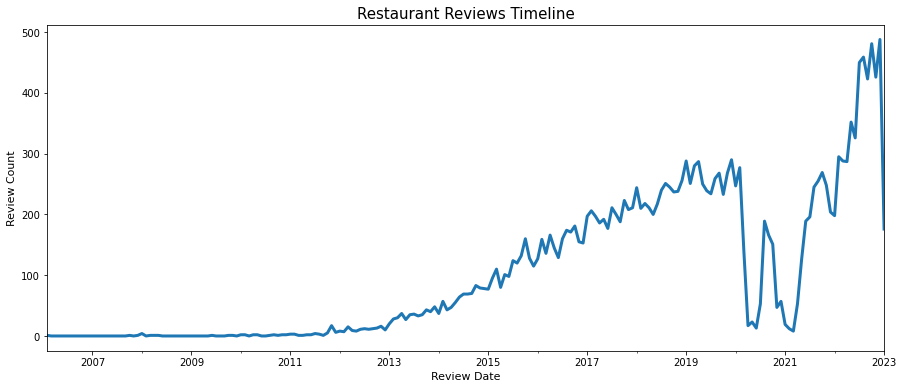

In [42]:
time_sample = df.groupby(pd.Grouper(key='review_date', freq='M', convention='start')).size()
time_sample.plot(figsize=(15,6), linewidth = 3)
#plt.xlim(pd.Timestamp('2010-01-01'),pd.Timestamp('2023-01-20'))
plt.ylabel('Review Count', fontsize=11)
plt.xlabel('Review Date', fontsize=11)
#plt.xticks(fontsize=18)
#plt.yticks(fontsize=18)
plt.title('Restaurant Reviews Timeline', fontsize=15)
#plt.grid(True)

#We see a dip in 2020-2021, probably because of the pandemic. Most reviews from our sample comes from 2019 and 2022.

In [43]:
df['stars'].dtype

dtype('int64')

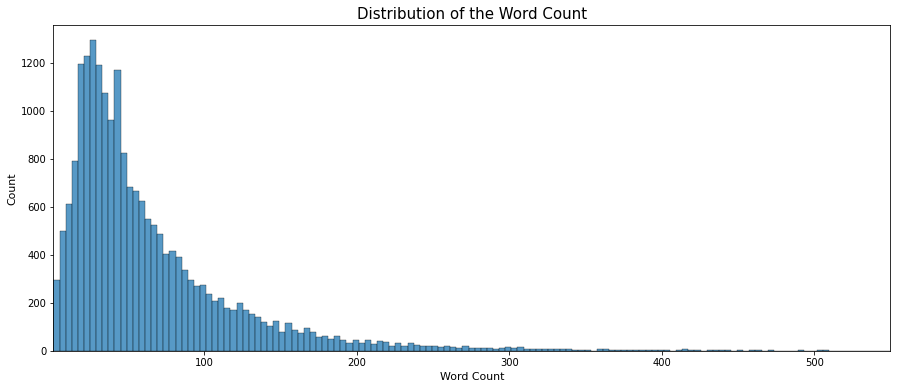

In [44]:
fig, ax = plt.subplots(figsize=(15, 6))
sns.histplot(df['word_count'])
ax.set_xlim(1, 550)
plt.title('Distribution of the Word Count', fontsize=15)
plt.xlabel("Word Count", fontsize=11)
plt.ylabel("Count", fontsize=11)
plt.show()

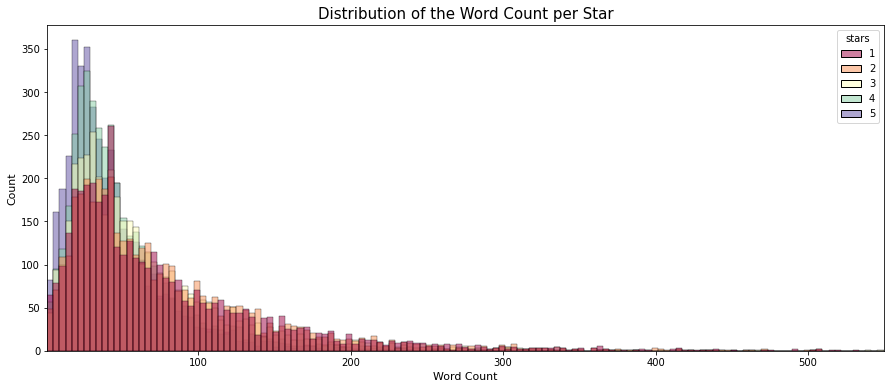

In [45]:
fig, ax = plt.subplots(figsize=(15, 6))
sns.histplot(data=df, x='word_count', hue='stars', palette='Spectral')
ax.set_xlim(1, 550)
plt.title('Distribution of the Word Count per Star', fontsize=15)
plt.xlabel("Word Count", fontsize=11)
plt.ylabel("Count", fontsize=11)
plt.show()

In [46]:
27741+46303-74025

19

In [47]:
df.groupby('stars')['word_count'].describe()

,count,mean,std,min,25%,50%,75%,max
stars,,,,,,,,
1,4146.0,80.516884,76.898961,1.0,31.0,57.0,105.0,757.0
2,4146.0,79.731066,71.762423,1.0,33.0,58.0,104.0,986.0
3,4146.0,67.967921,60.609611,1.0,29.0,50.0,87.0,696.0
4,4146.0,53.169320,45.224728,1.0,26.0,41.0,66.0,713.0
5,4146.0,45.514231,39.526869,1.0,22.0,35.0,57.0,735.0


# VADER Analyse
 
In this part we use the NLTK VADER package to get the sentiment scores and add them in the dataframe 

In [48]:
from nltk.sentiment import SentimentIntensityAnalyzer
sia = SentimentIntensityAnalyzer()

values_comp=[]
values_pos=[]
values_neg=[]
for i in range(len(df_sample)):
    value_comp= sia.polarity_scores(df_sample.iloc[i]["text"])["compound"]
    value_pos=sia.polarity_scores(df_sample.iloc[i]["text"])["pos"]
    value_neg=sia.polarity_scores(df_sample.iloc[i]["text"])["neg"]
    values_comp.append(value_comp)
    values_pos.append(value_pos)
    values_neg.append(value_neg)
    
df_sample["VADER_score"]=values_comp
df_sample["VADER_score_pos"]=values_pos
df_sample["VADER_score_neg"]=values_neg

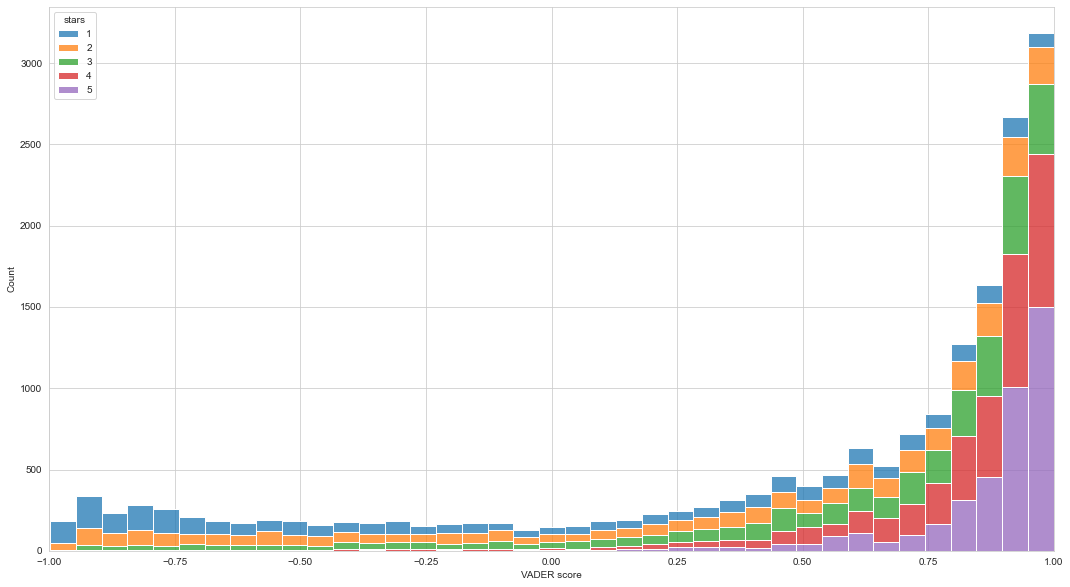

In [53]:
df_sample["stars"]=df_sample['stars'].astype('str') #make the stars string format to get better colors pallet 
sns.set_style("whitegrid")
sns.color_palette("hls", 8)
fig, ax = plt.subplots(figsize=(18, 10))
sns.histplot(data=df_sample[df_sample["VADER_score_pos"]!=0], x="VADER_score", hue="stars", multiple="stack")
ax.set_xlim(-1, 1)
plt.xlabel("VADER score")
plt.show()

(array([0, 1, 2, 3, 4]),
 [Text(0, 0, '1'),
  Text(0, 1, '2'),
  Text(0, 2, '3'),
  Text(0, 3, '4'),
  Text(0, 4, '5')])

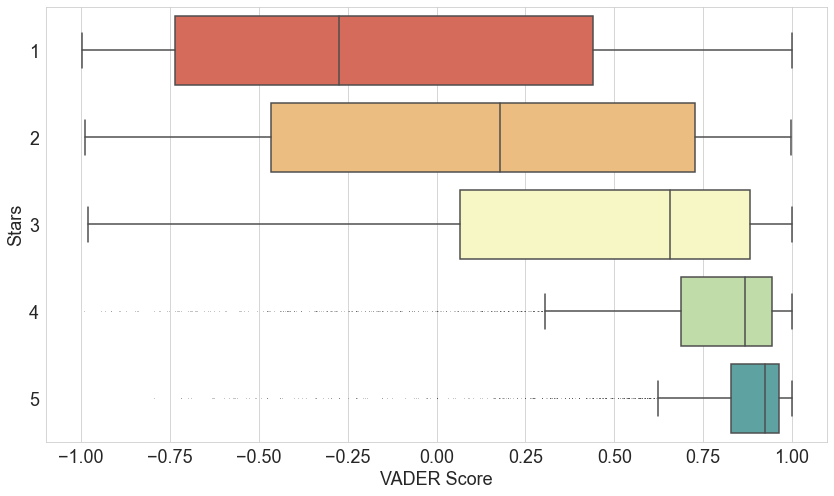

In [54]:
#creating a bloxplot to get more inside on the distribution of VADER compound scores 
fig, ax= plt.subplots(figsize=(14,8))
sns.boxplot(data=df_sample, x="VADER_score", y="stars", fliersize=0.1, palette="Spectral")
plt.xlabel("VADER Score", fontsize=18)
plt.ylabel("Stars", fontsize=18)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)